In [1]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import joblib 
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
df = pd.read_csv('cardio_data_processed.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


In [2]:
# Select the features to normalize
features_to_normalize = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Extract the feature columns from the dataframe
X = df[features_to_normalize]


In [3]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_normalized = scaler.fit_transform(X)

# Convert the normalized data back to a DataFrame for better readability
X_normalized_df = pd.DataFrame(X_normalized, columns=features_to_normalize)

# Show the normalized data
print(X_normalized_df)


            age    height    weight     ap_hi     ap_lo  cholesterol  gluc  \
0      0.588076  0.579487  0.269841  0.222222  0.333333          0.0   0.0   
1      0.730159  0.517949  0.391534  0.555556  0.500000          1.0   0.0   
2      0.624003  0.564103  0.280423  0.444444  0.166667          1.0   0.0   
3      0.528455  0.584615  0.375661  0.666667  0.666667          0.0   0.0   
4      0.516918  0.517949  0.238095  0.111111  0.000000          0.0   0.0   
...         ...       ...       ...       ...       ...          ...   ...   
68200  0.653659  0.579487  0.343915  0.333333  0.333333          0.0   0.0   
68201  0.913899  0.528205  0.608466  0.555556  0.500000          0.5   0.5   
68202  0.640186  0.656410  0.497354  1.000000  0.500000          1.0   0.0   
68203  0.900736  0.553846  0.322751  0.500000  0.333333          0.0   0.5   
68204  0.754317  0.589744  0.322751  0.333333  0.333333          0.5   0.0   

       smoke  alco  active  
0        0.0   0.0     1.0  
1    

In [4]:
X_normalized_df

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.588076,0.579487,0.269841,0.222222,0.333333,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.517949,0.391534,0.555556,0.500000,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.564103,0.280423,0.444444,0.166667,1.0,0.0,0.0,0.0,0.0
3,0.528455,0.584615,0.375661,0.666667,0.666667,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.517949,0.238095,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
68200,0.653659,0.579487,0.343915,0.333333,0.333333,0.0,0.0,1.0,0.0,1.0
68201,0.913899,0.528205,0.608466,0.555556,0.500000,0.5,0.5,0.0,0.0,1.0
68202,0.640186,0.656410,0.497354,1.000000,0.500000,1.0,0.0,0.0,1.0,0.0
68203,0.900736,0.553846,0.322751,0.500000,0.333333,0.0,0.5,0.0,0.0,0.0


In [5]:
df['bp_category'].unique()

array(['Hypertension Stage 1', 'Hypertension Stage 2', 'Normal',
       'Elevated'], dtype=object)

In [6]:
# Extract the min and scale values from the scaler
scaler_params = {
    'min': scaler.data_min_.tolist(),   # The minimum values for each feature
    'scale': scaler.data_range_.tolist() # The scaling factors for each feature
}

# Save the parameters as a JSON file
import json

with open('minmax_scaler_params.json', 'w') as json_file:
    json.dump(scaler_params, json_file)

print(scaler_params)


{'min': [10798.0, 55.0, 11.0, 90.0, 60.0, 1.0, 1.0, 0.0, 0.0, 0.0], 'scale': [12915.0, 195.0, 189.0, 90.0, 60.0, 2.0, 2.0, 1.0, 1.0, 1.0]}


In [7]:
# Step 1: Create a mapping dictionary for bp_category
bp_category_mapping = {label: idx for idx, label in enumerate(df['bp_category'].unique())}

# Step 2: Encode the 'bp_category' column using the mapping
df['bp_category_encoded'] = df['bp_category'].map(bp_category_mapping)

# Show the encoded dataframe
print(df)

# Step 3: Save the mapping as a JSON file
with open('bp_category_mapping.json', 'w') as json_file:
    json.dump(bp_category_mapping, json_file)

# Optionally, save the dataframe with the encoded column if needed
df.to_csv('encoded_data.csv', index=False)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
68200  99993  19240       2     168    76.0    120     80            1     1   
68201  99995  22601       1     158   126.0    140     90            2     2   
68202  99996  19066       2     183   105.0    180     90            3     1   
68203  99998  22431       1     163    72.0    135     80            1     2   
68204  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  age

In [8]:
X_normalized_df

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.588076,0.579487,0.269841,0.222222,0.333333,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.517949,0.391534,0.555556,0.500000,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.564103,0.280423,0.444444,0.166667,1.0,0.0,0.0,0.0,0.0
3,0.528455,0.584615,0.375661,0.666667,0.666667,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.517949,0.238095,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
68200,0.653659,0.579487,0.343915,0.333333,0.333333,0.0,0.0,1.0,0.0,1.0
68201,0.913899,0.528205,0.608466,0.555556,0.500000,0.5,0.5,0.0,0.0,1.0
68202,0.640186,0.656410,0.497354,1.000000,0.500000,1.0,0.0,0.0,1.0,0.0
68203,0.900736,0.553846,0.322751,0.500000,0.333333,0.0,0.5,0.0,0.0,0.0


In [9]:

# Now, combine the normalized data with the original dataframe
# Drop the original columns that are being normalized
df_combined = df.drop(columns=features_to_normalize)

# Concatenate the normalized dataframe with the original dataframe (excluding normalized columns)
df_combined = pd.concat([df_combined, X_normalized_df], axis=1)
df_combined.drop(columns='bp_category', inplace=True)

# Show the combined dataframe
print(df_combined)

          id  gender  cardio  age_years        bmi  bp_category_encoded  \
0          0       2       0         50  21.967120                    0   
1          1       1       1         55  34.927679                    1   
2          2       1       1         51  23.507805                    0   
3          3       2       1         48  28.710479                    1   
4          4       1       0         47  23.011177                    2   
...      ...     ...     ...        ...        ...                  ...   
68200  99993       2       0         52  26.927438                    0   
68201  99995       1       1         61  50.472681                    1   
68202  99996       2       1         52  31.353579                    1   
68203  99998       1       1         61  27.099251                    0   
68204  99999       1       0         56  24.913495                    0   

            age    height    weight     ap_hi     ap_lo  cholesterol  gluc  \
0      0.588076  0.57

In [22]:
df_combined.drop(columns='id', inplace=True)

In [24]:
df_combined.drop(columns='age_years', inplace=True)
df_combined.drop(columns='bmi', inplace=True)
df_combined

,gender,cardio,bp_category_encoded,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,2,0,0,0.588076,0.579487,0.269841,0.222222,0.333333,0.0,0.0,0.0,0.0,1.0
1,1,1,1,0.730159,0.517949,0.391534,0.555556,0.500000,1.0,0.0,0.0,0.0,1.0
2,1,1,0,0.624003,0.564103,0.280423,0.444444,0.166667,1.0,0.0,0.0,0.0,0.0
3,2,1,1,0.528455,0.584615,0.375661,0.666667,0.666667,0.0,0.0,0.0,0.0,1.0
4,1,0,2,0.516918,0.517949,0.238095,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2,0,0,0.653659,0.579487,0.343915,0.333333,0.333333,0.0,0.0,1.0,0.0,1.0
68201,1,1,1,0.913899,0.528205,0.608466,0.555556,0.500000,0.5,0.5,0.0,0.0,1.0
68202,2,1,1,0.640186,0.656410,0.497354,1.000000,0.500000,1.0,0.0,0.0,1.0,0.0
68203,1,1,0,0.900736,0.553846,0.322751,0.500000,0.333333,0.0,0.5,0.0,0.0,0.0


In [25]:
from sklearn.model_selection import train_test_split

# Assuming your combined dataframe is called df_combined
# Let's define the features and the target
X = df_combined.drop(columns=['bp_category_encoded'])  # Drop the target columns
y = df_combined['bp_category_encoded']  # Assuming this is your target column

# First split: 80% training, 20% temporary (for validation and testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 50% validation, 50% testing (from the temporary set)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now you have:
# - X_train, y_train: Training set (80% of the original data)
# - X_val, y_val: Validation set (10% of the original data)
# - X_test, y_test: Test set (10% of the original data)

# You can verify the sizes of each split:
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 54564
Validation set size: 6820
Test set size: 6821


In [26]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)

X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [ ]:

# Convert DataFrames to NumPy arrays and then to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # For classification, target must be long (int)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# Create TensorDataset which pairs the inputs and outputs (features and labels)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Create DataLoader for batching and shuffling the training set
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Create DataLoader for the validation set (no need for shuffling during evaluation)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)





In [68]:
# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]  # Number of features
output_size = len(y.unique())  # Number of unique classes
print(output_size)
print(input_size)

4
12


In [69]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [70]:


# Define the model
model = nn.Sequential(
    nn.Linear(input_size, 128),
    nn.ReLU(),
    nn.Dropout(0.05),  # Lower dropout
    nn.Linear(128, 64),
    nn.ReLU(),         # Consistent activation
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Dropout(0.05),
    nn.Linear(16, output_size)  # No Softmax here
)

import os
model_save_dir = 'model'
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)

# Initialize weights
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)  # Xavier initialization
        if m.bias is not None:
            nn.init.zeros_(m.bias)

model.apply(initialize_weights)
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Higher learning rate
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Training step
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Validation step
    model.eval()
    correct, total, val_loss = 0, 0, 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # Adjust learning rate based on validation loss
    scheduler.step(val_loss)

    # Save the model checkpoint every 10 epochs
    if (epoch + 1) % 10 == 0:
        torch.save(model.state_dict(), f'{model_save_dir}/model_{epoch+1}.pt')

# Save the final trained model
torch.save(model.state_dict(), f'{model_save_dir}/final_model.pt')


Epoch [1/200], Loss: 0.4344
Validation Loss: 0.2712, Validation Accuracy: 91.73%
Epoch [2/200], Loss: 0.2493
Validation Loss: 0.1490, Validation Accuracy: 95.50%
Epoch [3/200], Loss: 0.1182
Validation Loss: 0.0551, Validation Accuracy: 98.40%
Epoch [4/200], Loss: 0.0726
Validation Loss: 0.0469, Validation Accuracy: 99.03%
Epoch [5/200], Loss: 0.0623
Validation Loss: 0.0404, Validation Accuracy: 98.93%
Epoch [6/200], Loss: 0.0585
Validation Loss: 0.0431, Validation Accuracy: 98.90%
Epoch [7/200], Loss: 0.0563
Validation Loss: 0.0336, Validation Accuracy: 99.31%
Epoch [8/200], Loss: 0.0492
Validation Loss: 0.0338, Validation Accuracy: 99.00%
Epoch [9/200], Loss: 0.0485
Validation Loss: 0.0281, Validation Accuracy: 99.43%
Epoch [10/200], Loss: 0.0461
Validation Loss: 0.0285, Validation Accuracy: 99.37%
Epoch [11/200], Loss: 0.0443
Validation Loss: 0.0261, Validation Accuracy: 99.38%
Epoch [12/200], Loss: 0.0412
Validation Loss: 0.0251, Validation Accuracy: 99.24%
Epoch [13/200], Loss: 0.0

In [71]:
# Calculate the total number of parameters
total_params = sum(p.numel() for p in model.parameters())

In [72]:
total_params 


11028

C:\Users\rifat\AppData\Local\Temp\ipykernel_26240\3574674988.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'{model_save_dir}/final_m


Classification Report:


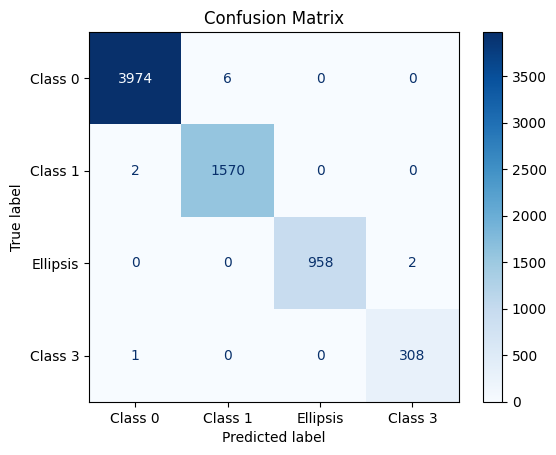

Test Accuracy: 99.84%

Per-Class Metrics:
Class 0 - Precision: 0.9992, Recall: 0.9985, F1-Score: 0.9989
Class 1 - Precision: 0.9962, Recall: 0.9987, F1-Score: 0.9975
Class 2 - Precision: 1.0000, Recall: 0.9979, F1-Score: 0.9990
Class 3 - Precision: 0.9935, Recall: 0.9968, F1-Score: 0.9952
Multi-Class ROC-AUC (OVR): 1.0000


In [76]:
import os
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Define the model (same architecture as trained)
model = nn.Sequential(
    nn.Linear(input_size, 128),
    nn.ReLU(),
    nn.Dropout(0.05),  # Lower dropout
    nn.Linear(128, 64),
    nn.ReLU(),         # Consistent activation
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Dropout(0.05),
    nn.Linear(16, output_size)  # No Softmax here
)

# Load the trained model weights
model.load_state_dict(torch.load(f'{model_save_dir}/final_model.pt'))
model.eval()  # Set model to evaluation mode
model.to(device)

# Test data preparation
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize variables to store results
y_true = []
y_pred = []
y_probs = []  # To store probabilities for metrics like ROC-AUC

# Evaluate the model on the test set
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Get model predictions
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Predicted labels
        probabilities = torch.softmax(outputs, dim=1)  # Probabilities for each class

        # Append results to lists
        y_true.extend(labels.cpu().numpy())  # Ground truth
        y_pred.extend(predicted.cpu().numpy())  # Predicted labels
        y_probs.extend(probabilities.cpu().numpy())  # Class probabilities

# Convert results to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_probs = np.array(y_probs)  # Probabilities for each class

# **1. Classification Report**
print("\nClassification Report:")

# **2. Confusion Matrix**
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", ..., f"Class {output_size-1}"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **3. Accuracy**
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# **4. Precision, Recall, and F1-Score**
precision = cm.diagonal() / cm.sum(axis=0)
recall = cm.diagonal() / cm.sum(axis=1)
f1_scores = 2 * (precision * recall) / (precision + recall)

print("\nPer-Class Metrics:")
for i, (p, r, f1) in enumerate(zip(precision, recall, f1_scores)):
    print(f"Class {i} - Precision: {p:.4f}, Recall: {r:.4f}, F1-Score: {f1:.4f}")

# **5. ROC-AUC (for multi-class)**
if output_size == 2:
    # For binary classification
    roc_auc = roc_auc_score(y_true, y_probs[:, 1])
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_probs[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    # For multi-class ROC-AUC (one-vs-rest approach)
    roc_auc_ovr = roc_auc_score(y_true, y_probs, multi_class='ovr')
    print(f"Multi-Class ROC-AUC (OVR): {roc_auc_ovr:.4f}")

# **6. Log Predictions (optional for debugging)**
# Save the predictions for analysis
np.savetxt("predictions.csv", np.column_stack((y_true, y_pred)), fmt='%d', delimiter=',', header='True,Predicted')



In [75]:
!pip install onnxruntime


   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.3 MB 16.7 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.3 MB 17.5 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.3 MB 16.3 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 16.1 MB/s eta 0:00:00


In [ ]:
import onnxruntime as ort
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Load the ONNX model
onnx_model_path = 'model/final_model.onnx'
session = ort.InferenceSession(onnx_model_path)

# Get the input and output names from the ONNX model
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
print(f"Input name: {input_name}, Output name: {output_name}")

# Prepare the test data (use the same test data you used for PyTorch)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).cpu().numpy()
y_test_tensor = y_test.values

# Initialize variables to store results
y_true = []
y_pred = []
y_probs = []

# Evaluate the model on the test set using ONNX Runtime
for i in range(0, len(X_test_tensor), 64):  # Assuming batch size of 64
    batch_input = X_test_tensor[i:i+64]
    batch_labels = y_test_tensor[i:i+64]
    
    # Run inference on the batch
    outputs = session.run([output_name], {input_name: batch_input.astype(np.float32)})
    
    # Get the predictions (class with max probability)
    predicted = np.argmax(outputs[0], axis=1)
    probabilities = outputs[0]  # Raw probabilities for each class
    
    # Append results to lists
    y_true.extend(batch_labels)
    y_pred.extend(predicted)
    y_probs.extend(probabilities)

# Convert results to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_probs = np.array(y_probs)

# **1. Classification Report**
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Class 0", "Class 1", ..., f"Class {output_size-1}"]))

# **2. Confusion Matrix**
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", ..., f"Class {output_size-1}"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **3. Accuracy**
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# **4. Precision, Recall, and F1-Score**
precision = cm.diagonal() / cm.sum(axis=0)
recall = cm.diagonal() / cm.sum(axis=1)
f1_scores = 2 * (precision * recall) / (precision + recall)

print("\nPer-Class Metrics:")
for i, (p, r, f1) in enumerate(zip(precision, recall, f1_scores)):
    print(f"Class {i} - Precision: {p:.4f}, Recall: {r:.4f}, F1-Score: {f1:.4f}")

# **5. ROC-AUC (for multi-class)**
if output_size == 2:
    # For binary classification
    roc_auc = roc_auc_score(y_true, y_probs[:, 1])
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_probs[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    # For multi-class ROC-AUC (one-vs-rest approach)
    roc_auc_ovr = roc_auc_score(y_true, y_probs, multi_class='ovr')
    print(f"Multi-Class ROC-AUC (OVR): {roc_auc_ovr:.4f}")

# **6. Log Predictions (optional for debugging)**
np.savetxt("predictions.csv", np.column_stack((y_true, y_pred)), fmt='%d', delimiter=',', header='True,Predicted')


NoSuchFile: [ONNXRuntimeError] : 3 : NO_SUCHFILE : Load model from model/final_model.onnx failed:Load model model/final_model.onnx failed. File doesn't exist

In [ ]:
import onnxruntime as ort
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Load the ONNX model
onnx_model_path = 'final_model.onnx'
session = ort.InferenceSession(onnx_model_path)

# Get the input and output names from the ONNX model
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
print(f"Input name: {input_name}, Output name: {output_name}")

# Prepare the test data (use the same test data you used for PyTorch)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).cpu().numpy()
y_test_tensor = y_test.values

# Initialize variables to store results
y_true = []
y_pred = []
y_probs = []

# Evaluate the model on the test set using ONNX Runtime
for i in range(0, len(X_test_tensor), 64):  # Assuming batch size of 64
    batch_input = X_test_tensor[i:i+64]
    batch_labels = y_test_tensor[i:i+64]
    
    # Run inference on the batch
    outputs = session.run([output_name], {input_name: batch_input.astype(np.float32)})
    
    # Get the predictions (class with max probability)
    predicted = np.argmax(outputs[0], axis=1)
    probabilities = outputs[0]  # Raw probabilities for each class
    
    # Append results to lists
    y_true.extend(batch_labels)
    y_pred.extend(predicted)
    y_probs.extend(probabilities)

# Convert results to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_probs = np.array(y_probs)

# **1. Classification Report**
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Class 0", "Class 1", ..., f"Class {output_size-1}"]))

# **2. Confusion Matrix**
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", ..., f"Class {output_size-1}"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **3. Accuracy**
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# **4. Precision, Recall, and F1-Score**
precision = cm.diagonal() / cm.sum(axis=0)
recall = cm.diagonal() / cm.sum(axis=1)
f1_scores = 2 * (precision * recall) / (precision + recall)

print("\nPer-Class Metrics:")
for i, (p, r, f1) in enumerate(zip(precision, recall, f1_scores)):
    print(f"Class {i} - Precision: {p:.4f}, Recall: {r:.4f}, F1-Score: {f1:.4f}")

# **5. ROC-AUC (for multi-class)**
if output_size == 2:
    # For binary classification
    roc_auc = roc_auc_score(y_true, y_probs[:, 1])
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_probs[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    # For multi-class ROC-AUC (one-vs-rest approach)
    roc_auc_ovr = roc_auc_score(y_true, y_probs, multi_class='ovr')
    print(f"Multi-Class ROC-AUC (OVR): {roc_auc_ovr:.4f}")

# **6. Log Predictions (optional for debugging)**
np.savetxt("predictions.csv", np.column_stack((y_true, y_pred)), fmt='%d', delimiter=',', header='True,Predicted')
